In [1]:
!pip install torchtuples
!pip install pycox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 629.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 15.3 MB/s eta 0:00:00
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2436 sha256=70568950d46f44706744b62e7c85abf8562f9d6c11be7b35ede38ffa6e2f46d9
  Stored in directory: /root/.cache/pip/wheels/a6/ff/5d/4f10de26fe5dd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

import torch
import torchtuples as tt

from pycox.models import CoxPH
from pycox.evaluation import EvalSurv

In [3]:
np.random.seed(1234)
_ = torch.manual_seed(123)

In [4]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Read the preprocessed file
brca = pd.read_csv('/content/drive/My Drive/3799/brca.csv')

In [7]:
brca_not_scaled = pd.read_csv('/content/drive/My Drive/3799_new/brca_not_scaled.csv')

In [8]:
brca.shape

(1079, 20315)

In [9]:
brca_not_scaled.shape

(1079, 61524)

In [10]:
brca_not_scaled

,status,time,age,number_of_lymph_nodes,lymph_node_examined_count,number_of_lymphnodes_positive_by_he,tumor_necrosis_percent,tumor_nuclei_percent,tumor_weight,A1BG,...,"diagnosis_method=other method, specify:",diagnosis_method=tumor resection,age_group=31-40,age_group=41-50,age_group=51-60,age_group=61-70,age_group=71-80,age_group=81-90,age_group=91-100,is_tnbc=1
0,0,259.0,70.0,0.0,2.0,0.0,0.0,85.0,500.0,49.1992,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,437.0,59.0,0.0,3.0,0.0,0.0,70.0,500.0,142.2976,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1321.0,56.0,0.0,8.0,0.0,0.0,90.0,500.0,192.8194,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,1463.0,54.0,0.0,2.0,0.0,0.0,75.0,500.0,326.0194,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,434.0,61.0,1.0,11.0,1.0,0.0,90.0,500.0,168.8309,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,0,428.0,75.0,2.0,2.0,2.0,10.0,40.0,189.0,766.8849,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1075,0,215.0,43.0,4.0,5.0,4.0,0.0,70.0,200.0,135.0227,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1076,0,562.0,71.0,1.0,3.0,1.0,3.0,60.0,400.0,160.6871,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1077,0,1062.0,48.0,0.0,4.0,0.0,0.0,80.0,103.0,90.7436,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
data = brca_not_scaled

In [12]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train, validation, and test sets while maintaining class balance
df_train_val, df_test = train_test_split(data, test_size=0.2, random_state=42, stratify=data['status'])
#df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=42, stratify=df_train_val['status'])

In [13]:
data = brca

In [14]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train, validation, and test sets while maintaining class balance
df_train_val, df_test = train_test_split(data, test_size=0.2, random_state=42, stratify=data['status'])
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=42, stratify=df_train_val['status'])

In [15]:
from sklearn_pandas import DataFrameMapper
# Get a list of all column names in the DataFrame
all_cols = data.iloc[:,2:].columns.tolist()

# Create a list of tuples for all columns
all_cols_tuples = [(col, None) for col in all_cols]

# Create the DataFrameMapper object with all columns
x_mapper = DataFrameMapper(all_cols_tuples)

In [16]:
x_train = x_mapper.fit_transform(df_train).astype('float32')
x_val = x_mapper.transform(df_val).astype('float32')
x_test = x_mapper.transform(df_test).astype('float32')

In [17]:
# Extract target
get_target = lambda df: (df['time'].values, df['status'].values)
y_train = get_target(df_train)
y_val = get_target(df_val)
y_test=get_target(df_test)
durations_test, events_test = get_target(df_test)
val = x_val, y_val

In [18]:
in_features = x_train.shape[1]
num_nodes = [32, 32]
out_features = 1
batch_norm = True
dropout = 0.1
output_bias = False

net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm,
                              dropout, output_bias=output_bias)

In [19]:
model = CoxPH(net, tt.optim.Adam)

In [20]:
num_nodes=[32, 32]
learning_rate = 0.1
epochs = 512
dropout = 0.1
batch_size = 512
callbacks = None
verbose = False
log = model.fit(x_train, y_train, batch_size, epochs, callbacks, verbose,
                val_data=val, val_batch_size=batch_size)

In [21]:
# num_nodes=[32, 32], learning_rate = 0.1, epochs = 512, dropout = 0.1, batch_size = 512

## Prediction

In [22]:
_ = model.compute_baseline_hazards()

In [23]:
surv = model.predict_surv_df(x_test)

In [24]:
surv_prob = surv.reset_index()

In [25]:
# Define the durations for 5 years and 10 years
duration_5_years = 1826.25  # 365.25 * 5
duration_10_years = 3652.5  # 365.25 * 10

# Find the closest survival probabilities for 5 years and 10 years
closest_row_5_years = surv_prob[surv_prob['duration'] <= duration_5_years].iloc[-1]
closest_row_10_years = surv_prob[surv_prob['duration'] <= duration_10_years].iloc[-1]

# Extract the survival probabilities for 5 years and 10 years
surv_prob_at_5_years = closest_row_5_years.iloc[1:].values
surv_prob_at_10_years = closest_row_10_years.iloc[1:].values

In [26]:
# Step 3: Identify high-risk and low-risk groups based on survival probabilities
#threshold = 0.5
threshold = np.median(surv_prob_at_5_years)
high_risk_indices = np.where(surv_prob_at_5_years < threshold)[0]
low_risk_indices = np.where(surv_prob_at_5_years >= threshold)[0]

In [27]:
test = df_test.copy()
test = test.iloc[:,2:]
test = test.reset_index(drop=True)
# use it to obtain the orginal values of all feature
test_not_scaled = brca_not_scaled.iloc[df_test.index, :]
test_not_scaled = test_not_scaled.reset_index(drop=True)

In [28]:
low_risk_surv = surv.iloc[:, low_risk_indices]
high_risk_surv = surv.iloc[:, high_risk_indices]

In [29]:
# Set larger font size
plt.rcParams.update({'font.size': 12})

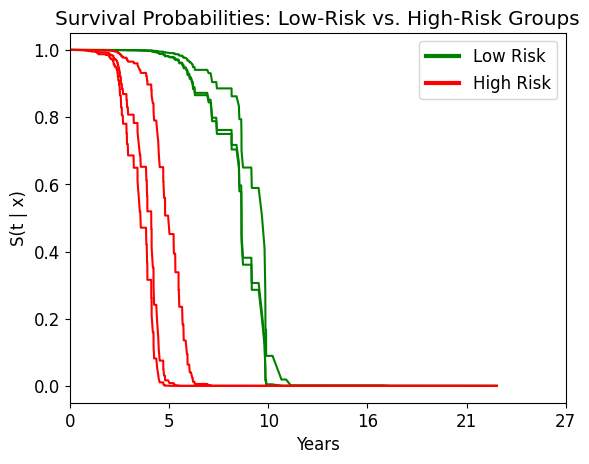

In [73]:
# Plot survival probabilities of the first 5 high-risk and low-risk groups
ax = surv.iloc[:, low_risk_indices[[2,5,11]]].plot(color='green', legend=False)
surv.iloc[:, high_risk_indices[[1,2,5]]].plot(ax=ax, color='red', legend=False)
plt.ylabel('S(t | x)')
plt.xlabel('Years')  # Change xlabel to 'Years'
plt.title('Survival Probabilities: Low-Risk vs. High-Risk Groups') # (First 3)

# Convert x-axis values from days to years
plt.xticks(ticks=ax.get_xticks(), labels=(ax.get_xticks() / 365.25).astype(int))

# Manually create legend with specified colors
legend_labels = ['Low Risk', 'High Risk']
legend_handles = [
    plt.Line2D([0], [0], color='green', linewidth=3),
    plt.Line2D([0], [0], color='red', linewidth=3)
]

plt.legend(legend_handles, legend_labels, loc='best')

plt.xlim(left=-5)  # Set x-axis limit to start from 0

plt.show()

In [31]:
# Plot survival probabilities of the first 5 high-risk and low-risk groups
#ax = surv.iloc[:, low_risk_indices[:3]].plot(color='green', legend=False)
surv.iloc[:, high_risk_indices[2:5]].plot(ax=ax, color='red', legend=False)
#plt.ylabel('S(t | x)')
#plt.xlabel('Years')  # Change xlabel to 'Years'
#plt.title('Survival Probabilities: Low-Risk vs. High-Risk Groups') # (First 3)

# Convert x-axis values from days to years
#plt.xticks(ticks=ax.get_xticks(), labels=(ax.get_xticks() / 365.25).astype(int))

# Manually create legend with specified colors
#legend_labels = ['Low Risk', 'High Risk']
#legend_handles = [
#    plt.Line2D([0], [0], color='green', linewidth=3),
#    plt.Line2D([0], [0], color='red', linewidth=3)
#]
#
#plt.legend(legend_handles, legend_labels, loc='best')

#plt.xlim(left=-5)  # Set x-axis limit to start from 0

#plt.show()

<Axes: title={'center': 'Survival Probabilities: Low-Risk vs. High-Risk Groups'}, xlabel='duration', ylabel='S(t | x)'>

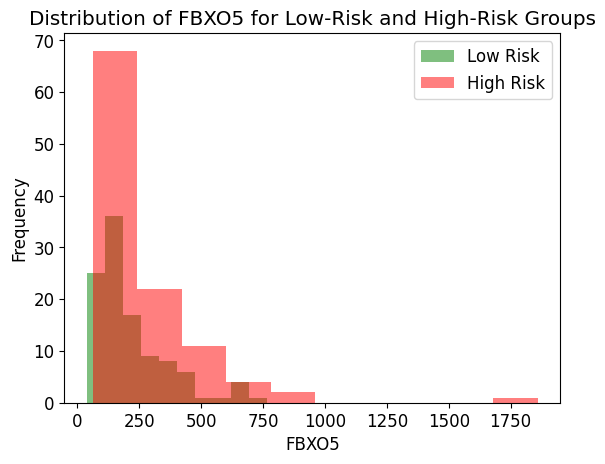

In [32]:
import matplotlib.pyplot as plt

feat = 'FBXO5'

low_risk = test_not_scaled.iloc[low_risk_indices, :][feat]
high_risk = test_not_scaled.iloc[high_risk_indices, :][feat]

# Plot histograms for low-risk and high-risk groups
plt.hist(low_risk, color='green', alpha=0.5, label='Low Risk')
plt.hist(high_risk, color='red', alpha=0.5, label='High Risk')

# Add labels and title
plt.xlabel(feat)
plt.ylabel('Frequency')
plt.title('Distribution of '+ feat + ' for Low-Risk and High-Risk Groups')
plt.legend()

# Show plot
plt.show()

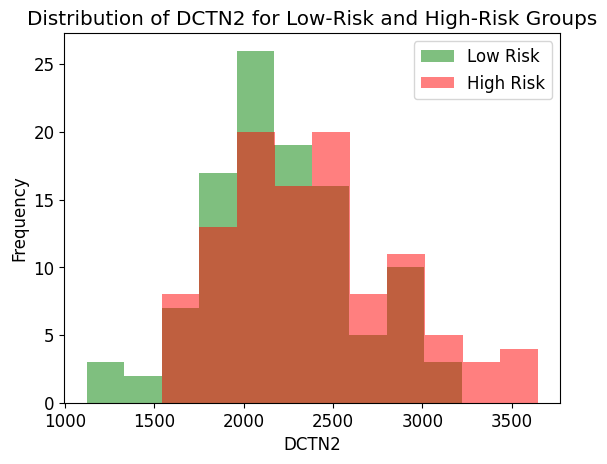

In [33]:
import matplotlib.pyplot as plt

feat = 'DCTN2'

low_risk = test_not_scaled.iloc[low_risk_indices, :][feat]
high_risk = test_not_scaled.iloc[high_risk_indices, :][feat]

# Plot histograms for low-risk and high-risk groups
plt.hist(low_risk, color='green', alpha=0.5, label='Low Risk')
plt.hist(high_risk, color='red', alpha=0.5, label='High Risk')

# Add labels and title
plt.xlabel(feat)
plt.ylabel('Frequency')
plt.title('Distribution of '+ feat + ' for Low-Risk and High-Risk Groups')
plt.legend()

# Show plot
plt.show()

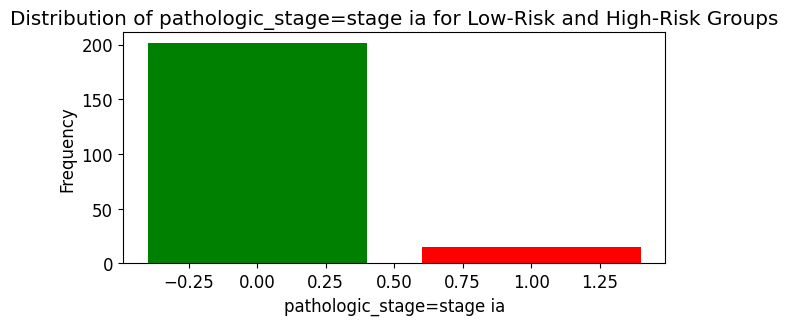

In [34]:
feat = 'pathologic_stage=stage ia'

# Select 'age' column for low-risk and high-risk groups
low_risk = test_not_scaled.loc[low_risk_indices, feat]
high_risk = test_not_scaled.loc[high_risk_indices, feat]

# Get unique categories and their counts
categories = pd.concat([low_risk, high_risk]).value_counts()

# Set the figure size
plt.figure(figsize=(7, 3))

# Plot bar plot for the categories
plt.bar(categories.index, categories.values, color=['green', 'red'])

# Add labels and title
plt.xlabel(feat)
plt.ylabel('Frequency')
plt.title('Distribution of ' + feat + ' for Low-Risk and High-Risk Groups')

# Show plot
plt.show()

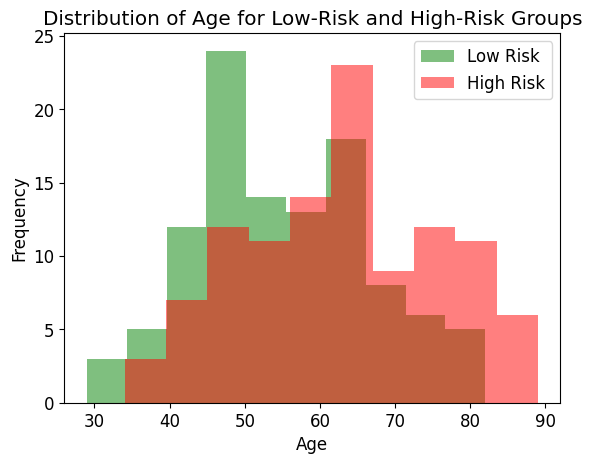

In [35]:
import matplotlib.pyplot as plt

# Select 'age' column for low-risk and high-risk groups
low_risk_age = test_not_scaled.iloc[low_risk_indices, :]['age']
high_risk_age = test_not_scaled.iloc[high_risk_indices, :]['age']

# Plot histograms for low-risk and high-risk groups
plt.hist(low_risk_age, color='green', alpha=0.5, label='Low Risk')
plt.hist(high_risk_age, color='red', alpha=0.5, label='High Risk')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age for Low-Risk and High-Risk Groups')
plt.legend()

# Show plot
plt.show()

In [74]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

significant_features = []
for feat in test_not_scaled.columns:
    low_risk_values = test_not_scaled.iloc[low_risk_indices][feat]
    high_risk_values = test_not_scaled.iloc[high_risk_indices][feat]

    # Check if the range of the data is zero
    if low_risk_values.max() == low_risk_values.min() or high_risk_values.max() == high_risk_values.min():
        # Skip Shapiro-Wilk test and directly perform Mann-Whitney U test
        t_stat, p_val = mannwhitneyu(low_risk_values, high_risk_values)
    else:
        # Perform Shapiro-Wilk test to check for normality
        _, low_p_val = shapiro(low_risk_values)
        _, high_p_val = shapiro(high_risk_values)

        # Set significance level (alpha)
        alpha = 0.05

        # If both groups are normally distributed, perform t-test
        if low_p_val > alpha and high_p_val > alpha:
            t_stat, p_val = ttest_ind(low_risk_values, high_risk_values)
        else:
            # If either group is not normally distributed, perform Mann-Whitney U test
            t_stat, p_val = mannwhitneyu(low_risk_values, high_risk_values)

    # Check for significance
    if p_val < alpha:
        significant_features.append(feat)

In [75]:
len(significant_features)

9299

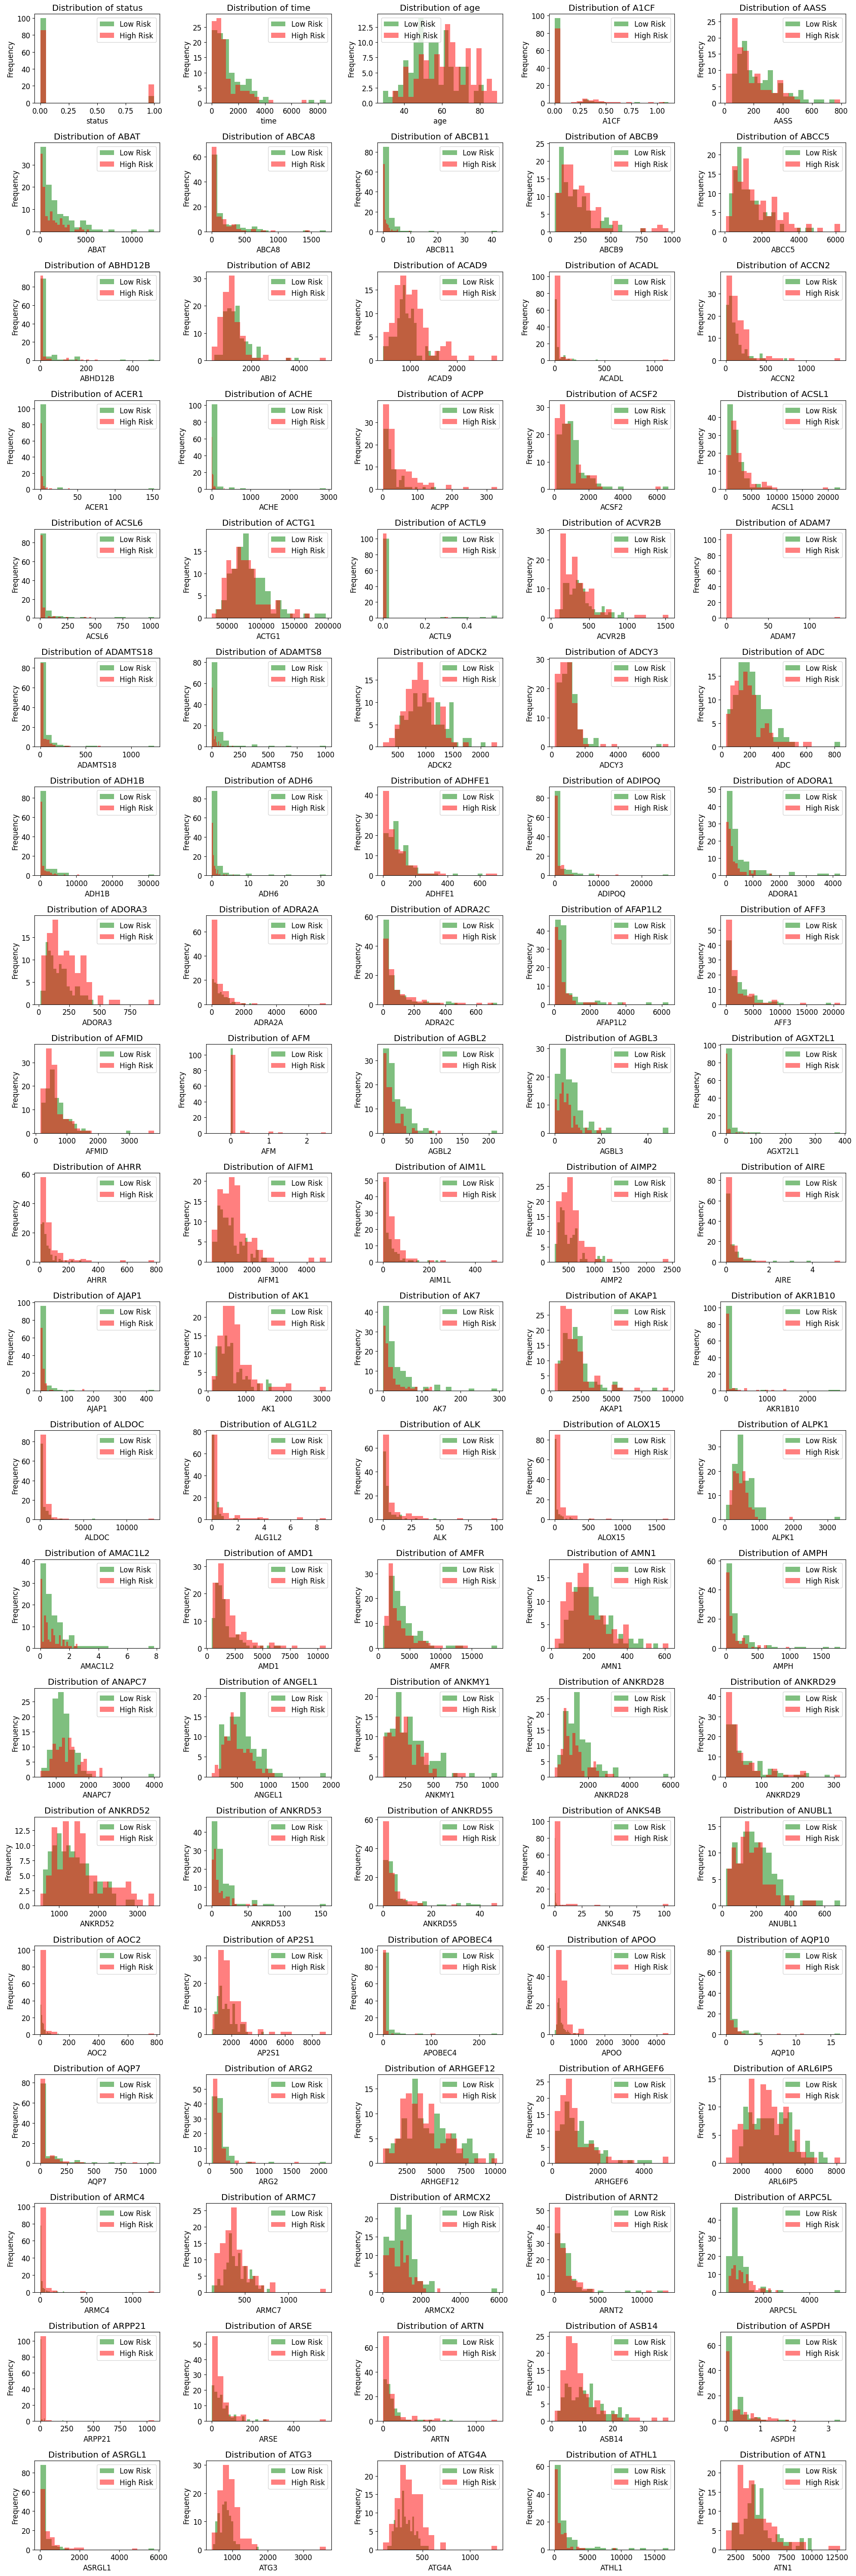

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of rows and columns for the grid layout
n_rows = 1
n_cols = 5

# Calculate the total number of plots needed
total_plots = min(100, len(significant_features))  # Limit to the first 100 features if more exist

# Calculate the number of rows needed based on the total number of plots
n_rows = (total_plots + n_cols - 1) // n_cols

# Create a figure with a grid layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))

# Loop through the features and plot each feature in the grid
for idx, feat in enumerate(significant_features[:total_plots]):
    row = idx // n_cols
    col = idx % n_cols

    # Get the appropriate subplot
    ax = axes[row, col]

    # Get data for low-risk and high-risk groups
    low_risk = test_not_scaled.iloc[low_risk_indices][feat].values
    high_risk = test_not_scaled.iloc[high_risk_indices][feat].values

    # Plot histograms for low-risk and high-risk groups
    ax.hist(low_risk, bins=20, color='green', alpha=0.5, label='Low Risk')
    ax.hist(high_risk, bins=20, color='red', alpha=0.5, label='High Risk')

    # Add labels and title
    ax.set_xlabel(feat)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {feat}')
    ax.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()